In [11]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/final_limpio.csv')
df.head(2)

,Unnamed: 0,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,0,680565,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,83194.0,Married,Star,4462.45,Standard,2013,6,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,1,680565,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,83194.0,Married,Star,4462.45,Standard,2013,6,NaN,NaN,2017,2,8,0,8,784,78.0,0,0


****Fase 3: Bonus**** : Evaluación de diferencias en reservas de vuelos por nivel educativo

3.1. Preparación de datos

In [4]:
# 'Education' , 'Flights Booked'
# Hacemos un DF con estas dos columnas
df_r_ne = pd.DataFrame(zip(df['Education'],df['Flights Booked']))
df_r_ne.head()

,0,1
0,Bachelor,0
1,Bachelor,8
2,Bachelor,9
3,Bachelor,0
4,Bachelor,10


3.2. Análisis descriptivo

In [5]:
# Agrupamos por nivel educativo
df_analisis = df_r_ne.groupby(0)[[1]].sum().reset_index()
# Cambiamos los nombres de las columnas
df_analisis.columns = ['nivel_educativo','vuelos_reservados']
df_analisis

,nivel_educativo,vuelos_reservados
0,Bachelor,121642
1,College,51470
2,Doctor,8139
3,High School or Below,8654
4,Master,6349


In [ ]:
# Sacamos datos estadísticos para la variable objetivo del estudio
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
vuelos_reservados,5.0,39250.8,49810.278555,6349.0,8139.0,8654.0,51470.0,121642.0


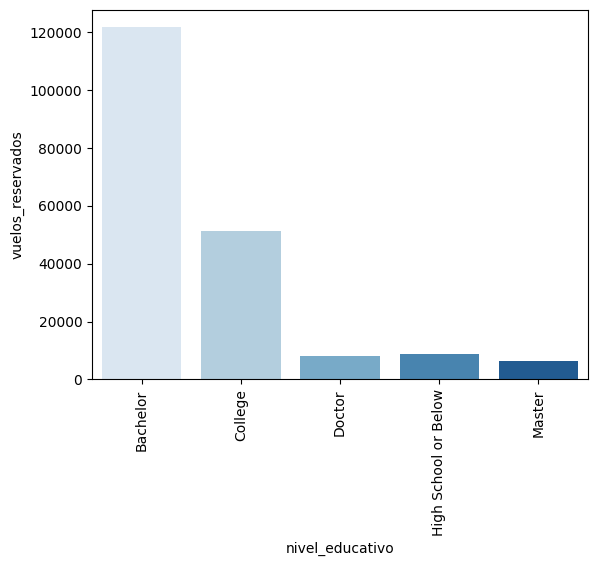

In [9]:
# Como tenemos más de 2 variables, hacemos un Análisis de varianza (ANOVA)
# analizamos los datos primero visualmente
sns.barplot(x='nivel_educativo', 
            y='vuelos_reservados', 
            data=df_analisis,  
            palette = "Blues")
plt.xticks(rotation = 90);

In [10]:
#'nivel_educativo' 'vuelos_reservados' 
df_analisis['nivel_educativo'].unique()

array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object)

In [12]:
anova_resultado = f_oneway(df_analisis['vuelos_reservados'][df_analisis['nivel_educativo'] == 'Bachelor'],
                            df_analisis['vuelos_reservados'][df_analisis['nivel_educativo'] == 'College'],
                            df_analisis['vuelos_reservados'][df_analisis['nivel_educativo'] == 'Doctor'],
                            df_analisis['vuelos_reservados'][df_analisis['nivel_educativo'] == 'High School or Below'],
                            df_analisis['vuelos_reservados'][df_analisis['nivel_educativo'] == 'Master'])

# Imprimir resultados
print("Estadístico F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

# Interpretar los resultados
alpha = 0.05
if anova_resultado.pvalue < alpha:
    print("Hay diferencias significativas en el promedio de vuelos entre al menos dos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          P
          """)

else:
    print("No hay evidencia de diferencias significativas en el promedio de vuelos entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,

          """)

Estadístico F: nan
Valor p: nan
No hay evidencia de diferencias significativas en el promedio de vuelos entre los grupos.

 ---------- 

 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,

          
